# Exact GPs - Demo Notebook

In this notebook, I will do a short demonstration for how we can use GPy with the simple wrapper.

In [2]:
import os, sys
cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)
sys.path.insert(0, parent_dir) 

import numpy as np
from exact import GPR
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

## Data

In [3]:
rng = np.random.RandomState(0)

# Generate sample data
noise = 0.5
n_train = 100
X = 15 * rng.rand(n_train, 1)

def f(x): return np.sin(x)

y = f(X)
y += 3 * (0.5 - rng.rand(X.shape[0], X.shape[1]))  # add noise
X_plot = np.linspace(0, 20, 10000)[:, None]

### Plot Helper

In [7]:
def plot_results():
    # Plot results
    plt.figure(figsize=(10, 5))
    lw = 2
    plt.scatter(X, y, c='k', label='data')
    plt.plot(X_plot, np.sin(X_plot), color='navy', lw=lw, label='True')

    plt.plot(X_plot, y_gpr, color='darkorange', lw=lw,
             label='GPR' )
    plt.fill_between(X_plot[:, 0], 
                     (y_gpr - 2*y_std).squeeze(), 
                     (y_gpr + 2*y_std).squeeze(), color='darkorange',
                     alpha=0.2)
    plt.xlabel('data')
    plt.ylabel('target')
    plt.xlim(0, 20)
    plt.ylim(-4, 4)
    plt.title('GPR versus Kernel Ridge')
    plt.legend(loc="best",  scatterpoints=1, prop={'size': 8})
    plt.show()

## Exact GP Model

In [5]:
gpr_clf = GPR(verbose=None, n_restarts=0)

gpr_clf.fit(X, y);

{'dataplot': [<matplotlib.collections.PathCollection at 0x13e93b1d0>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x13ddb6c88>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x13e93b940>]}

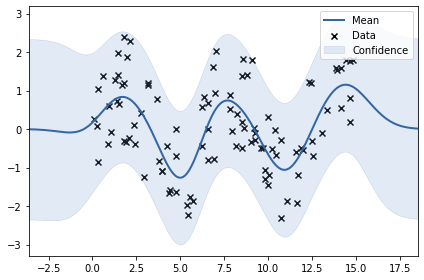

In [9]:
gpr_clf.gp_model.plot()

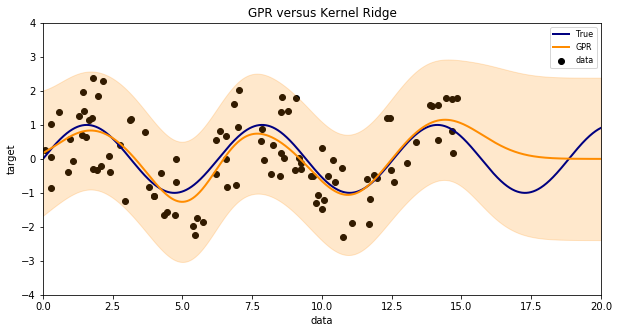

In [8]:
y_gpr, y_std = gpr_clf.predict(X_plot, return_std=True, noiseless=False)
plot_results()

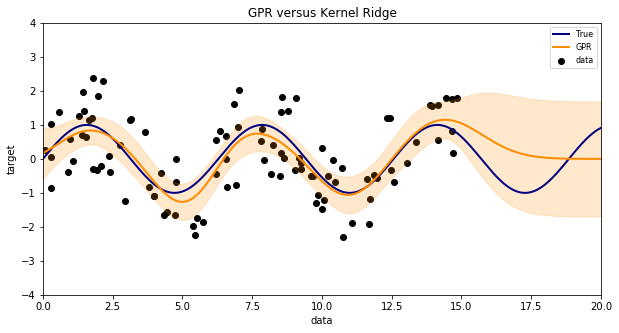

In [10]:
y_gpr, y_std = gpr_clf.predict(X_plot, return_std=True, noiseless=True)
plot_results()